In [1]:
import pandas as pd
import requests
import sqlite3

In [10]:
def get_listings():
    """Returns a list of all listings."""
    # Connect to the database.
    db = sqlite3.connect("db/listings.db")
    cursor = db.cursor()

    # Get all listings from the database.
    cursor.execute("SELECT * FROM listings")

    # Create a list of all listings.
    listings = []
    for row in cursor.fetchall():
        listings.append(row)

    # Close the connection to the database.
    db.close()

    # Return the list of listings.
    return listings

items = get_listings()

In [33]:
df = pd.DataFrame(items, columns=["id", "title","price", "link"])
df["price"] = df["price"].apply(lambda p: int(p.replace('$', '').replace(',', '')))
df = df[["title", "price", "link"]]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18990 entries, 0 to 18989
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   18990 non-null  object
 1   price   18990 non-null  int64 
 2   link    18990 non-null  object
dtypes: int64(1), object(2)
memory usage: 445.2+ KB


In [35]:
df = df[df["price"] != 0]
df = df.sort_values("price", ascending=False)

In [36]:
make = "Mercedes"
tdf = df[df["title"].str.contains(make, case=False)]

In [37]:
tdf

,title,price,link
8748,"Beautiful 2023 Mercedes Sprinter AWD, Fresh Bu...",129950,https://anchorage.craigslist.org/search/cta#se...
8658,"Beautiful 2023 Mercedes Sprinter AWD, Fresh Bu...",129950,https://anchorage.craigslist.org/search/cta#se...
8695,"Beautiful 2023 Mercedes Sprinter AWD, Fresh Bu...",129950,https://anchorage.craigslist.org/search/cta#se...
8746,"Beautiful 2023 Mercedes Sprinter AWD, Fresh Bu...",129950,https://anchorage.craigslist.org/search/cta#se...
8681,"Beautiful 2023 Mercedes Sprinter AWD, Fresh Bu...",129950,https://anchorage.craigslist.org/search/cta#se...
...,...,...,...
14711,1997 Mercedes S300,3000,https://annarbor.craigslist.org/search/cta#sea...
14714,1997 Mercedes S300,3000,https://annarbor.craigslist.org/search/cta#sea...
14720,1997 Mercedes S300,3000,https://annarbor.craigslist.org/search/cta#sea...
14717,1997 Mercedes S300,3000,https://annarbor.craigslist.org/search/cta#sea...


<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 8748 to 14716
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   270 non-null    object
 1   price   270 non-null    int64 
 2   link    270 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.4+ KB


<Axes: ylabel='Frequency'>

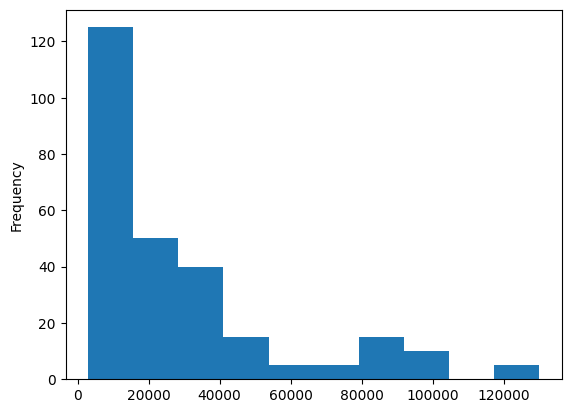

In [38]:
tdf.info()
tdf["price"].plot(kind="hist",bins=10)

In [51]:
tdf[tdf["price"] < 10000]
tdf.loc[14711]

title                                   1997 Mercedes S300
price                                                 3000
link     https://annarbor.craigslist.org/search/cta#sea...
Name: 14711, dtype: object

In [55]:
import requests
 
response = requests.get(
  "https://proxy.webshare.io:9999/api/v2/proxy/list/"
)
 
response.json()

ConnectionError: HTTPSConnectionPool(host='proxy.webshare.io', port=9999): Max retries exceeded with url: /api/v2/proxy/list/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fb4d3cbf2b0>: Failed to establish a new connection: [Errno 111] Connection refused'))